In [44]:
from astropy.table import Table
import astropy.units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd
from scipy.interpolate import interp1d

%matplotlib inline

In [30]:
DATA = []

for i in range(1,21):
    
    A = Table.read(str(i)+'.eep', format = 'ascii', data_start = 0, fast_reader = True)
    DATA.append(A)

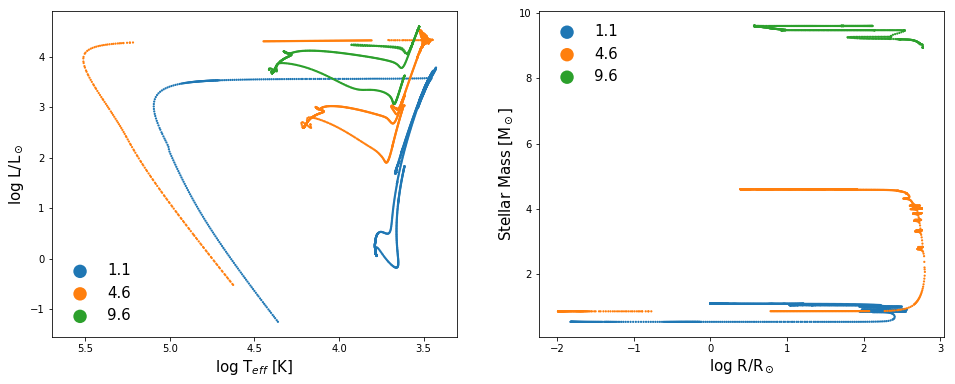

In [31]:
# plt.figure(figsize = (8,6))

# cmap = plt.cm.get_cmap('rainbow', 40)

# for i in range(1,len(DATA)):
    
#     plt.scatter(DATA[i]['col12'], DATA[i]['col7'], s = 5, edgecolors = 'none')

fig, ((axA, axB)) = plt.subplots(figsize = (16,6), ncols = 2, nrows = 1 )

axA.scatter(DATA[2]['col12'], DATA[2]['col7'], s = 5, edgecolors = 'none', label = '1.1') 
axA.scatter(DATA[9]['col12'], DATA[9]['col7'], s = 5, edgecolors = 'none', label = '4.6')
axA.scatter(DATA[19]['col12'], DATA[19]['col7'], s = 5, edgecolors = 'none', label = '9.6')
axA.set_xlabel(r'log T$_{eff}$ [K]', size = 15)
axA.set_ylabel(r'log L/L$_\odot$', size = 15)
axA.legend(frameon = False, prop={'size': 15},markerscale=6 , loc = 'best')
axA.set_xlim(5.7, 3.3)

axB.scatter(DATA[2]['col14'], DATA[2]['col2'], s = 5, edgecolors = 'none', label = '1.1') 
axB.scatter(DATA[9]['col14'], DATA[9]['col2'], s = 5, edgecolors = 'none', label = '4.6')
axB.scatter(DATA[19]['col14'], DATA[19]['col2'], s = 5, edgecolors = 'none', label = '9.6')
axB.set_xlabel(r'log R/R$_\odot$', size = 15)
axB.set_ylabel(r'Stellar Mass [M$_\odot$]', size = 15)
axB.legend(frameon = False, prop={'size': 15},markerscale=6 , loc = 'best')

plt.savefig('Tracks.png', dpi = 300)

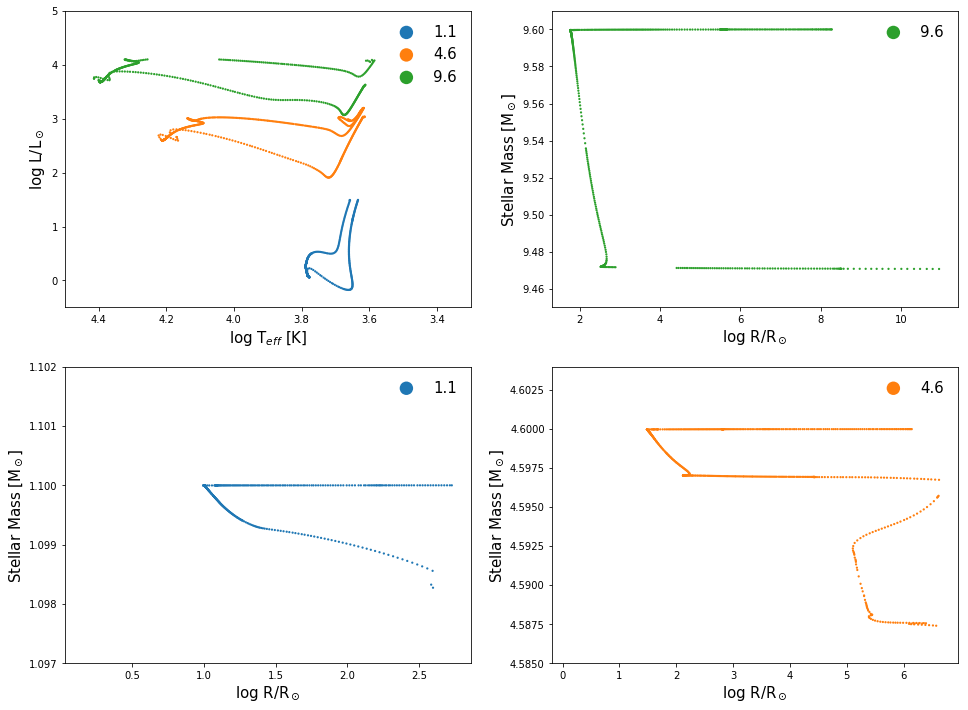

In [32]:
DATA_2 = np.stack(zip(DATA[2]['col2'],DATA[2]['col7'],DATA[2]['col12'],DATA[2]['col14']))
DATA_2 = DATA_2[np.where(DATA[2]['col12'] > 3.5) and np.where(DATA[2]['col12'] < 3.8) and np.where(DATA[2]['col7'] > -0.5) and np.where(DATA[2]['col7'] < 1.5)]

DATA_9 = np.stack(zip(DATA[9]['col2'],DATA[9]['col7'],DATA[9]['col12'],DATA[9]['col14']))
DATA_9 = DATA_9[np.where(DATA[9]['col12'] > 3.5) and np.where(DATA[9]['col12'] < 4.3) and np.where(DATA[9]['col7'] > -1.0) and np.where(DATA[9]['col7'] < 3.2)]

DATA_19 = np.stack(zip(DATA[19]['col2'],DATA[19]['col7'],DATA[19]['col12'],DATA[19]['col14']))
DATA_19 = DATA_19[np.where(DATA[19]['col12'] > 3.5) and np.where(DATA[19]['col12'] < 4.5) and np.where(DATA[19]['col7'] > 3.0) and np.where(DATA[19]['col7'] < 4.1)]


fig, ((axA, axB), (axC, axD)) = plt.subplots(figsize = (16,12), ncols = 2, nrows = 2 )

axA.scatter(DATA_2[:,2], DATA_2[:,1], s = 5, edgecolors = 'none', label = '1.1') 
axA.scatter(DATA_9[:,2], DATA_9[:,1], s = 5, edgecolors = 'none', label = '4.6')
axA.scatter(DATA_19[:,2], DATA_19[:,1], s = 5, edgecolors = 'none', label = '9.6')
axA.set_xlabel(r'log T$_{eff}$ [K]', size = 15)
axA.set_ylabel(r'log L/L$_\odot$', size = 15)
axA.legend(frameon = False, prop={'size': 15},markerscale=6 , loc = 'best')
axA.set_xlim(4.5, 3.3)
axA.set_ylim(-0.5, 5.0)

# axB.scatter(DATA_2[:,3], DATA_2[:,0], s = 5, edgecolors = 'none', label = '1.1') 
# axB.scatter(DATA_9[:,3], DATA_9[:,0], s = 5, edgecolors = 'none', label = '4.6')
axB.scatter(np.exp(DATA_19[:,3]), DATA_19[:,0], s = 5, edgecolors = 'none', c = 'C2', label = '9.6')
axB.set_xlabel(r'log R/R$_\odot$', size = 15)
axB.set_ylabel(r'Stellar Mass [M$_\odot$]', size = 15)
# axB.set_xlim(0, 2)
axB.set_ylim(9.45, 9.61)
axB.legend(frameon = False, prop={'size': 15},markerscale=6 , loc = 'best')

axC.scatter(np.exp(DATA_2[:,3]), DATA_2[:,0], s = 5, edgecolors = 'none', label = '1.1')
axC.set_xlabel(r'log R/R$_\odot$', size = 15)
axC.set_ylabel(r'Stellar Mass [M$_\odot$]', size = 15)
# axC.set_xlim(0, 2.2)
axC.set_ylim(1.097, 1.102)
axC.legend(frameon = False, prop={'size': 15},markerscale=6 , loc = 'best')

axD.scatter(np.exp(DATA_9[:,3]), DATA_9[:,0], s = 5, edgecolors = 'none', c = 'C1', label = '4.6')
axD.set_xlabel(r'log R/R$_\odot$', size = 15)
axD.set_ylabel(r'Stellar Mass [M$_\odot$]', size = 15)
# axD.set_xlim(0, 2)
axD.set_ylim(4.585, 4.604)
axD.legend(frameon = False, prop={'size': 15},markerscale=6 , loc = 'best')

plt.savefig('Tracks_zoomed.png', dpi = 300)

In [33]:
# Isochrone = Table.read('Isochrones/Isochrone_20Myr.dat', format = 'ascii', data_start = 0, fast_reader = True)
# plt.scatter(Isochrone['col9'], Isochrone['col16'])
# plt.xlabel('Luminosity')
# plt.ylabel('Radius')

In [34]:
# Isochrone = Table.read('Isochrones/Isochrones_15_25.dat', format = 'ascii', data_start = 0, fast_reader = True)
# plt.scatter(Isochrone['col9'], Isochrone['col16'], s = 1)
# plt.xlabel('Luminosity')
# plt.ylabel('Radius')

In [77]:
#Isochrones

Isochrones = []

for i in range(1,6):
#     print(i)
    
    B = Table.read('Isochrones/Isochrone_'+str(i)+'.dat', format = 'ascii', data_start = 0, fast_reader = True)
    Isochrones.append(B)
    
#Stellar Tracks
DATA = []

for i in range(1,21):
    A = Table.read(str(i)+'.eep', format = 'ascii', data_start = 0, fast_reader = True)
    DATA.append(A)

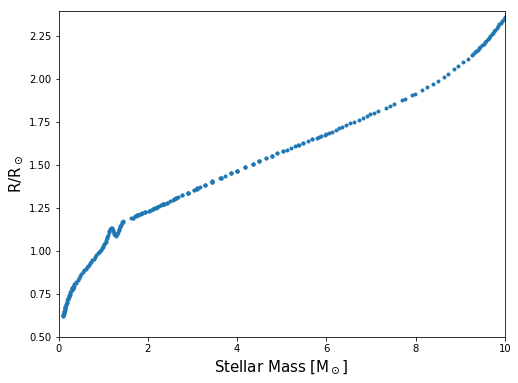

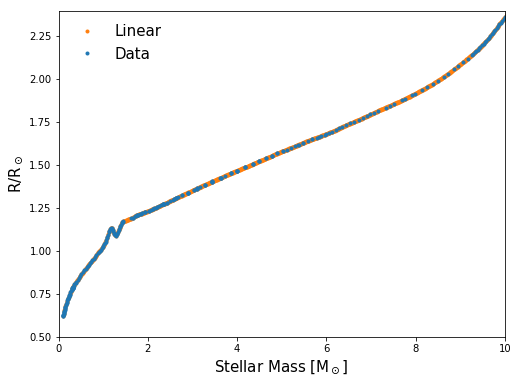

In [78]:
#Radius and Mass for 20Myr Isochrone
#this will be use to cross-match the proper relation between
#the stellar mass and radius for a stellar population of 20Myrs old.

Radius_Mass_Model = np.stack(zip(Isochrones[1]['col4'], Isochrones[1]['col12']))

plt.figure(figsize = (8,6))
plt.plot(Isochrones[1]['col4'], np.exp(Isochrones[1]['col12']), '.')
plt.xlabel(r'Stellar Mass [M$_\odot$]', size = 15)
plt.ylabel(r'R/R$_\odot$', size = 15)
plt.xlim(0, 10)
plt.ylim(0.5, 2.4)
plt.savefig('Radius_Mass_Model.png', dpi = 300)

np.savetxt('Radius_Mass_Model.dat', np.c_[Radius_Mass_Model[:,0], Radius_Mass_Model[:,1]], delimiter = ',')

x = Isochrones[1]['col4']
y = np.exp(Isochrones[1]['col12'])

f1 = interp1d(x, y)
# f2 = interp1d(x, y, kind = 'cubic')

xnew = np.linspace(Isochrones[1]['col4'][0], Isochrones[1]['col4'][-1], num = 1000, endpoint = True)

plt.figure(figsize = (8,6))
# plt.plot(x, y, '.', xnew, f1(xnew), '-', xnew, f2(xnew), '--')
plt.plot(xnew, f1(xnew), '.', c = 'C1')
plt.plot(x, y, '.', c = 'C0')
plt.legend(['Linear', 'Data'], frameon = False, loc='best', prop={'size': 15})
plt.xlabel(r'Stellar Mass [M$_\odot$]', size = 15)
plt.ylabel(r'R/R$_\odot$', size = 15)
plt.xlim(0, 10)
plt.ylim(0.5, 2.4)
plt.savefig('Radius_Mass_Model_Interpolated.png', dpi = 300)

np.savetxt('Radius_Mass_Model_1.dat', np.c_[xnew, f1(xnew)], delimiter = ',')

In [83]:
Main_Sequence = []

#Taking all the stellar tracks from 0.1 to 10 M_sun 
#Using only the columns corresponding to Luminosity and Effective Temperature
#

for k in range(0, 20):
    
    MS = np.stack(zip(DATA[k]['col7'], DATA[k]['col12']))
    MS = MS[np.where(DATA[k]['col77'] == 0.0)]
#     print(len(MS))
    Main_Sequence.append(np.median(MS, axis = 0))
    
Main_Sequence = np.array(Main_Sequence)    

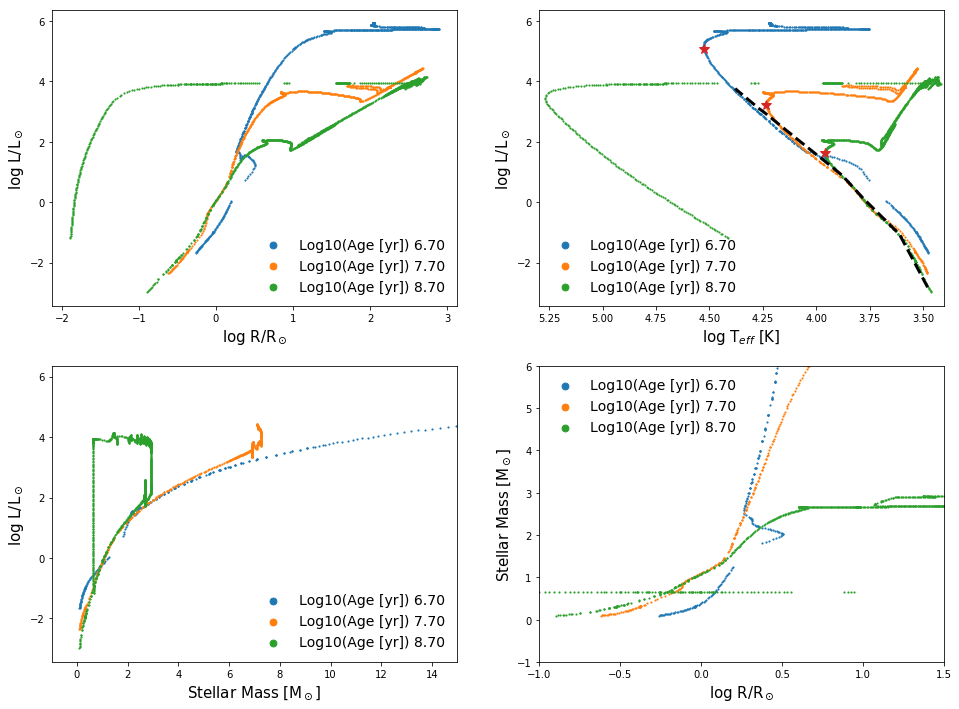

In [109]:
# Age_linear = [5e6, 20e6, 50e6, 500e6, 1000e6] 
# Age_log    = np.log10(Age_linear)
# T = np.linspace(10**3, 10**5.2, 1000)
# Log_L = np.linspace(-1,7,100)
# Log_T = np.linspace(3.25,4.75,100)
# Log_LL = np.log10([8e-4, 3e-3, 0.03, 0.3, 1, 5, 60 , 600, 10000, 17000, 80000, 500000, 790000])
# Log_TT = np.log10([2660, 2900, 3800, 5000, 6000, 7000, 11000, 17000, 22000, 28000, 35000, 38000, 44500])

fig, ((axA, axB),(axC, axD)) = plt.subplots(figsize = (16,12), nrows = 2, ncols = 2)

for i in range(0,5):
#     if i == 0 or i == 1 or i == 2 or i == 3:
    if i == 0 or i == 2 or i == 3:
        
        TAMS = np.stack(zip(Isochrones[i]['col11'], Isochrones[i]['col8']))
        TAMS = TAMS[np.where(Isochrones[i]['col1'] == 353)]
        
        axA.scatter(Isochrones[i]['col12'], Isochrones[i]['col8'], s = 1.3, label = 'Log10(Age [yr]) %.2f'%Age_log[i])
        
        axB.scatter(Isochrones[i]['col11'], Isochrones[i]['col8'], s = 1.3, label = 'Log10(Age [yr]) %.2f'%Age_log[i])
        axB.plot(TAMS[:,0], TAMS[:,1], '*', c = 'C3', ms = 10)
        
        axC.scatter(Isochrones[i]['col4'], Isochrones[i]['col8'], s = 1.3, label = 'Log10(Age [yr]) %.2f'%Age_log[i])
        
        axD.scatter(Isochrones[i]['col12'], Isochrones[i]['col4'], s = 1.3, label = 'Log10(Age [yr]) %.2f'%Age_log[i])

axA.set_ylabel(r'log L/L$_\odot$', size = 15)
axA.set_xlabel(r'log R/R$_\odot$', size = 15)
axA.legend(frameon = False, prop={'size': 14},markerscale=6 , loc = 'best')

axB.set_ylabel(r'log L/L$_\odot$', size = 15)
axB.set_xlabel(r'log T$_{eff}$ [K]', size = 15)
axB.set_xlim(5.3, 3.4)
# axB.set_xlim(3.8, 3.45)
# axB.set_ylim(-3, 2)
axB.legend(frameon = False, prop={'size': 14},markerscale = 6 , loc = 'best')
# axB.plot(np.log10(T), np.log10(8.96e-16*T**4), ls = '--', color = 'black', linewidth = 2)
#The number one can be changed to model different solar radius
# axB.plot(np.log10(T), np.log10(1.0**2*8.96e-16*T**4), ls = '--', color = 'black', linewidth = 2)
# axB.plot(Log_T, 7.6*Log_T - 29.5, ls = '--', color = 'black', linewidth = 2)
# axB.plot(Log_TT, Log_LL, ls = '--', color = 'black', linewidth = 2)
axB.plot(Main_Sequence[:,1], Main_Sequence[:,0], ls = '--', color = 'k', linewidth = 3)
# axB.plot(4.5, 5.4, '*', c = 'C3', ms = 15)
# axB.plot(4.22, 3.4, '*', c = 'C3', ms = 15)
# axB.plot(3.95, 1.7, '*', c = 'C3', ms = 15)
# axB.axhline(3.4, ls = '--', c = 'black')
# axB.axhline(5.4, ls = '--', c = 'black')
# axB.axhline(1.7, ls = '--', c = 'black')
# axB.axhline(3.4)
# axB.grid()

axC.set_ylabel(r'log L/L$_\odot$', size = 15)
axC.set_xlabel(r'Stellar Mass [M$_\odot$]', size = 15)
axC.set_xlim(-1, 15)
axC.legend(frameon = False, prop={'size': 14},markerscale = 6 , loc = 'best')

axD.set_ylabel(r'Stellar Mass [M$_\odot$]', size = 15)
axD.set_xlabel(r'log R/R$_\odot$', size = 15)
axD.set_xlim(-1, 1.5)
axD.set_ylim(-1, 6)
axD.legend(frameon = False, prop={'size': 14},markerscale = 6 , loc = 'best')

plt.savefig('Isochrones.png', dpi = 300)

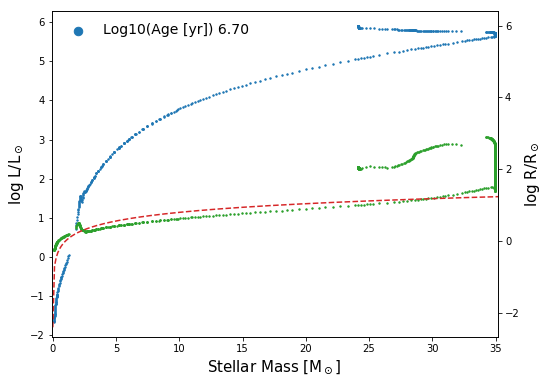

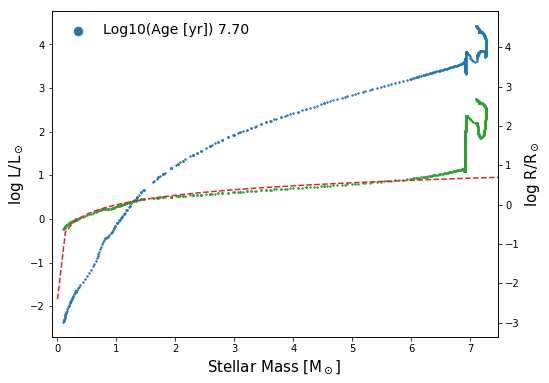

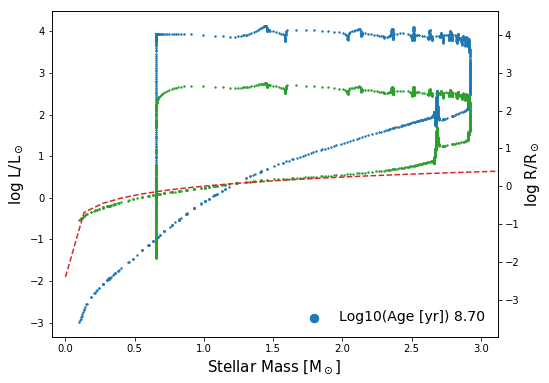

In [110]:
M = np.linspace(0.001,40, 300)
R = M**0.8

for i in range(0,5):
    if i == 0 or i == 2 or i == 3:
        
        plt.figure(figsize = (8,6))
        axA = plt.gca()
        axAA = axA.twinx()

        axA.scatter(Isochrones[i]['col4'], Isochrones[i]['col8'], s = 2, label = 'Log10(Age [yr]) %.2f'%Age_log[i])
        axA.set_ylabel(r'log L/L$_\odot$', size = 15)
        axA.set_xlabel(r'Stellar Mass [M$_\odot$]', size = 15)
        axAA.scatter(Isochrones[i]['col4'], Isochrones[i]['col12'], s = 2, c = 'C2')
        axAA.plot(M, np.log10(R),'--', c = 'C3')
        axAA.set_ylabel(r'log R/R$_\odot$', size = 15)
        axAA.set_xlim(np.min(Isochrones[i]['col4'])-0.2, np.max(Isochrones[i]['col4'])+0.2)
        axAA.set_ylim(np.min(Isochrones[i]['col8'])-1, np.max(Isochrones[i]['col8'])+0.5)
        axA.legend(frameon = False, prop={'size': 14},markerscale = 6 , loc = 'best')
        
        plt.savefig('Isochrones_%.2f.png'%Age_log[i], dpi = 300)

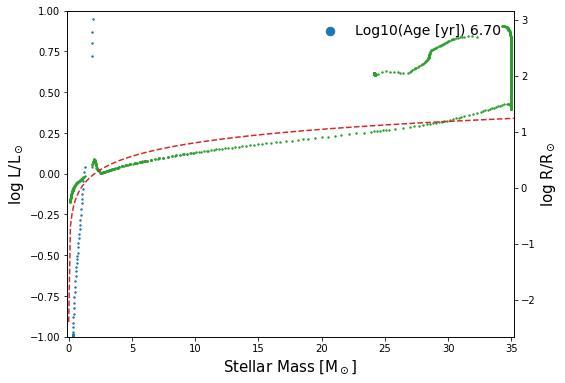

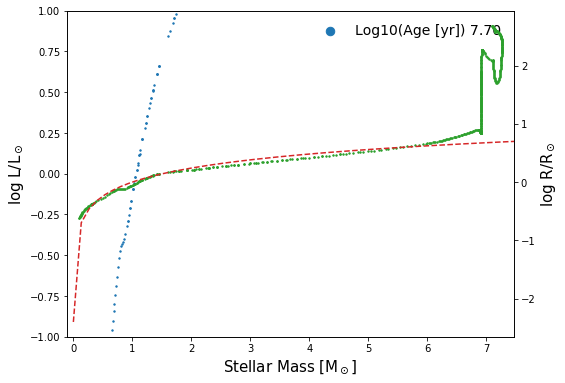

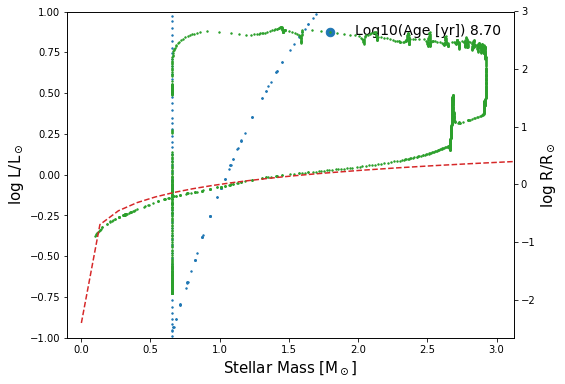

In [111]:
for i in range(0,5):
    if i == 0 or i == 2 or i == 3:
        
        plt.figure(figsize = (8,6))
        axA = plt.gca()
        axAA = axA.twinx()

        axA.scatter(Isochrones[i]['col4'], Isochrones[i]['col8'], s = 2, label = 'Log10(Age [yr]) %.2f'%Age_log[i])
        axA.set_ylabel(r'log L/L$_\odot$', size = 15)
        axA.set_xlabel(r'Stellar Mass [M$_\odot$]', size = 15)
        axAA.scatter(Isochrones[i]['col4'], Isochrones[i]['col12'], s = 2, c = 'C2')
        axAA.plot(M, np.log10(R),'--', c = 'C3')
        axAA.set_ylabel(r'log R/R$_\odot$', size = 15)
        axAA.set_xlim(np.min(Isochrones[i]['col4'])-0.2, np.max(Isochrones[i]['col4'])+0.2)
        axA.set_ylim(-1, 1)
        axA.legend(frameon = False, prop={'size': 14},markerscale = 6 , loc = 'best')
        
        plt.savefig('Isochrones_%.2f_zoom.png'%Age_log[i], dpi = 300)

In [112]:
# plt.plot(Isochrones[1]['col3'], np.exp(Isochrones[1]['col12']))
# plt.xlim(0.1, 10)
# plt.ylim(0.5, 2.56)

In [113]:
#5Myr
# DATA_1 = np.stack(zip(Isochrones[0]['col4'],Isochrones[0]['col8'],Isochrones[0]['col12']))
# DATA_1 = DATA_1[np.where(Isochrones[0]['col11'] < 4.0) and np.where(Isochrones[0]['col8'] < 2)]
# DATA_1 = DATA_1[np.where(Isochrones[0]['col11'] > 4.4) and np.where(Isochrones[0]['col11'] < 3.4) and np.where(Isochrones[0]['col8'] > -3.5) and np.where(Isochrones[0]['col8'] < 5)]

#50Myr
# DATA_2 = np.stack(zip(Isochrones[2]['col4'],Isochrones[2]['col8'],Isochrones[2]['col12']))
# DATA_2 = DATA_2[np.where(Isochrones[2]['col11'] < 3.7) and np.where(Isochrones[2]['col8'] < 0)]
# DATA_2 = DATA_2[np.where(Isochrones[2]['col11'] > 4.25) and np.where(Isochrones[2]['col11'] < 3.4) and np.where(Isochrones[2]['col8'] > -3) and np.where(Isochrones[2]['col8'] < 3.4)]

#500Myr
# DATA_3 = np.stack(zip(Isochrones[3]['col4'],Isochrones[3]['col8'],Isochrones[3]['col12']))
# DATA_3 = DATA_3[np.where(Isochrones[3]['col11'] < 3.55) and np.where(Isochrones[3]['col8'] < -1)]
# DATA_3 = DATA_3[np.where(Isochrones[3]['col11'] > 4) and np.where(Isochrones[3]['col11'] < 3.4) and np.where(Isochrones[3]['col8'] > -3) and np.where(Isochrones[3]['col8'] < 1.7)]

#20Myr
# DATA_4 = np.stack(zip(Isochrones[1]['col4'],Isochrones[1]['col8'],Isochrones[1]['col12']))
# DATA_4 = DATA_4[np.where(Isochrones[1]['col11'] < 3.70) and np.where(Isochrones[1]['col8'] < 0)]

#5Myr
DATA_1 = np.stack(zip(Isochrones[0]['col4'],Isochrones[0]['col8'],Isochrones[0]['col12'],Isochrones[0]['col25']))
DATA_1 = DATA_1[np.where(Isochrones[0]['col25'] == -1.0)]

#50Myr
DATA_2 = np.stack(zip(Isochrones[2]['col4'],Isochrones[2]['col8'],Isochrones[2]['col12'],Isochrones[2]['col25']))
DATA_2 = DATA_2[np.where(Isochrones[2]['col25'] == -1.0)]

#500Myr
DATA_3 = np.stack(zip(Isochrones[3]['col4'],Isochrones[3]['col8'],Isochrones[3]['col12'],Isochrones[3]['col25']))
DATA_3 = DATA_3[np.where(Isochrones[3]['col25'] == -1.0)]

#20Myr
DATA_4 = np.stack(zip(Isochrones[1]['col4'],Isochrones[1]['col8'],Isochrones[1]['col12'],Isochrones[1]['col25']))
DATA_4 = DATA_4[np.where(Isochrones[1]['col25'] == -1.0)]

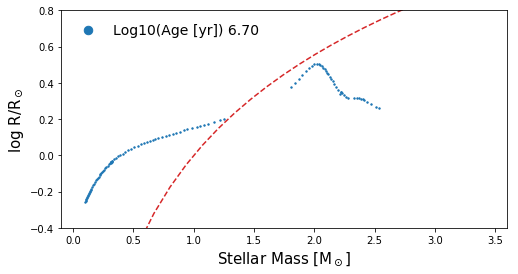

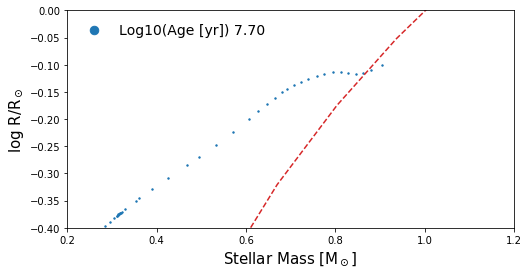

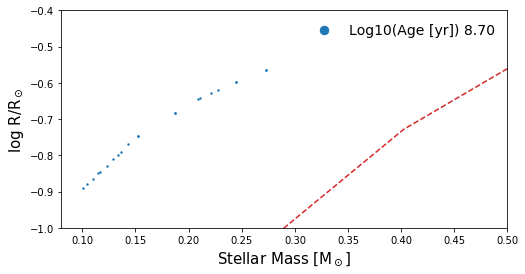

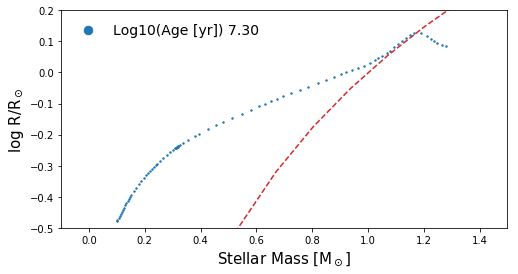

In [118]:
plt.figure(figsize = (8,4))
plt.scatter(DATA_1[:,0], DATA_1[:,2], s = 2, label = 'Log10(Age [yr]) %.2f'%Age_log[0])
plt.plot(M, np.log(R),'--', c = 'C3')
# plt.xlim(-1,24)
# plt.ylim(-0.4, 1.2)
plt.xlim(-0.1,3.6)
plt.ylim(-0.4, 0.8)
plt.ylabel(r'log R/R$_\odot$', size = 15)
plt.xlabel(r'Stellar Mass [M$_\odot$]', size = 15)
plt.legend(frameon = False, prop={'size': 14},markerscale = 6 , loc = 'best')
plt.savefig('5million.png', dpi = 300)

plt.figure(figsize = (8,4))
plt.scatter(DATA_2[:,0], DATA_2[:,2], s = 2, label = 'Log10(Age [yr]) %.2f'%Age_log[2])
plt.plot(M, np.log(R),'--', c = 'C3')
# plt.xlim(0,7)
# plt.ylim(-0.4, 0.81)
plt.xlim(0.2, 1.2)
plt.ylim(-0.4, 0.0)
plt.ylabel(r'log R/R$_\odot$', size = 15)
plt.xlabel(r'Stellar Mass [M$_\odot$]', size = 15)
plt.legend(frameon = False, prop={'size': 14},markerscale = 6 , loc = 'best')
plt.savefig('50million.png', dpi = 300)

plt.figure(figsize = (8,4))
plt.scatter(DATA_3[:,0], DATA_3[:,2], s = 2, label = 'Log10(Age [yr]) %.2f'%Age_log[3])
plt.plot(M, np.log(R),'--', c = 'C3')
# plt.xlim(0,2.8)
# plt.ylim(-1.1, 0.5)
plt.xlim(0.08,0.5)
plt.ylim(-1.0, -0.4)
plt.ylabel(r'log R/R$_\odot$', size = 15)
plt.xlabel(r'Stellar Mass [M$_\odot$]', size = 15)
plt.legend(frameon = False, prop={'size': 14},markerscale = 6 , loc = 'best')
plt.savefig('500million.png', dpi = 300)

plt.figure(figsize = (8,4))
plt.scatter(DATA_4[:,0], DATA_4[:,2], s = 2, label = 'Log10(Age [yr]) %.2f'%Age_log[1])
plt.plot(M, np.log(R),'--', c = 'C3')
plt.xlim(-0.1, 1.5)
plt.ylim(-0.5, 0.2)
plt.ylabel(r'log R/R$_\odot$', size = 15)
plt.xlabel(r'Stellar Mass [M$_\odot$]', size = 15)
plt.legend(frameon = False, prop={'size': 14},markerscale = 6 , loc = 'best')
plt.savefig('20million.png', dpi = 300)

In [54]:
# Mirar esot bien plt.plot(M, R,'--', c = 'C3')